In [160]:
# Import TensorFlow

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #Esto apra evitar error de certificado ssl a la hora de descargar el dataset CIFAR10

In [161]:
CIFAR10 = keras.datasets.cifar10

In [162]:
(train_images, train_labels), (test_images, test_labels) = CIFAR10.load_data()

In [163]:
print(train_images.shape)
print(train_images.dtype)

(50000, 32, 32, 3)
uint8


In [164]:
print(train_labels.shape)

(50000, 1)


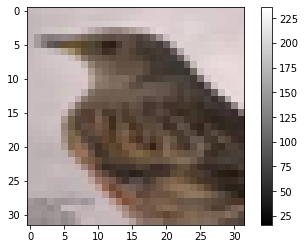

In [165]:
plt.figure()
plt.imshow(train_images[18], cmap='gray')
plt.colorbar()

In [166]:
#Escalamos los valores de pixeles entre 0 y 1
x_train = train_images/255. 
x_test = test_images/255. 

In [167]:
# Reorganizamos en forma de fila  los valores de las clases usando la funcion  flatten()
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [168]:
# Calcular numero de clases
K = len(set(train_labels))
print("numero de clases:", K)

numero de clases: 10


In [169]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship,', 'truck']

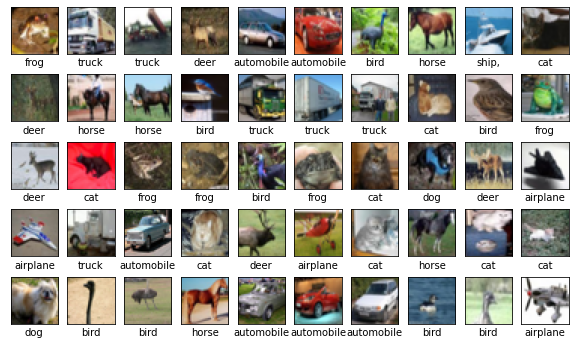

In [170]:
plt.figure(figsize=(10,6))
for i in range(50): # 50 el numero de imagenes
    plt.subplot(5,10,i+1) # 5 filas de  10columnas
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [171]:
from tensorflow.keras import layers

In [172]:
model = keras.models.Sequential()

model.add(layers.Flatten(input_shape=[32,32,3]))

model.add(layers.Dense(units=512, kernel_initializer=keras.initializers.glorot_uniform, bias_initializer=keras.initializers.Zeros, activation='relu'))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))



In [173]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 3072)              0         
                                                                 
 dense_61 (Dense)            (None, 512)               1573376   
                                                                 
 dense_62 (Dense)            (None, 100)               51300     
                                                                 
 dense_63 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1,625,686
Trainable params: 1,625,686
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [175]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [176]:
model.evaluate(x_test, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.4204 - sparse_categorical_accuracy: 0.1032


[2.4203903675079346, 0.10320000350475311]

In [177]:
print('Training model...\n')

history = model.fit(x=x_train, 
                    y=train_labels, 
                    batch_size=None,
                    epochs=20, 
                    validation_split=0.2, 
                    shuffle=True)

print('Model trained successfully!')

Training model...

Epoch 1/20
1250/1250 [==============================] - 11s 8ms/step - loss: 1.8843 - sparse_categorical_accuracy: 0.3247 - val_loss: 1.7912 - val_sparse_categorical_accuracy: 0.3696
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7066 - sparse_categorical_accuracy: 0.3949 - val_loss: 1.6751 - val_sparse_categorical_accuracy: 0.4029
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6239 - sparse_categorical_accuracy: 0.4257 - val_loss: 1.6164 - val_sparse_categorical_accuracy: 0.4312
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5679 - sparse_categorical_accuracy: 0.4442 - val_loss: 1.6124 - val_sparse_categorical_accuracy: 0.4293
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5200 - sparse_categorical_accuracy: 0.4622 - val_loss: 1.5630 - val_sparse_categorical_accuracy: 0.4403
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/st

In [178]:
df_history = pd.DataFrame(history.history)
df_history

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.884302,0.324675,1.791162,0.3696
1,1.706635,0.394875,1.675123,0.4029
2,1.623891,0.425650,1.616435,0.4312
3,1.567864,0.444225,1.612404,0.4293
4,1.519965,0.462150,1.562970,0.4403
5,1.482998,0.475450,1.516935,0.4655
6,1.452024,0.485450,1.492753,0.4696
7,1.422976,0.494525,1.472885,0.4799
8,1.393866,0.506875,1.464196,0.4878
9,1.368763,0.514975,1.497392,0.4733


<AxesSubplot:title={'center':'loss vs. epochs'}, xlabel='epochs', ylabel='loss'>

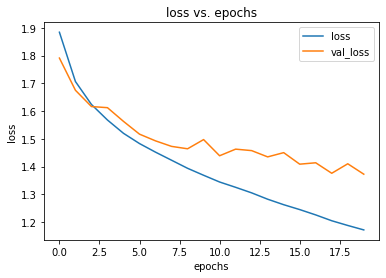

In [179]:
df_history.plot(y=['loss', 'val_loss'], title='loss vs. epochs', xlabel='epochs', ylabel='loss', legend=True)

<AxesSubplot:title={'center':'Train Accuracy vs. Val. Accuracy'}, xlabel='epochs', ylabel='Accuracy'>

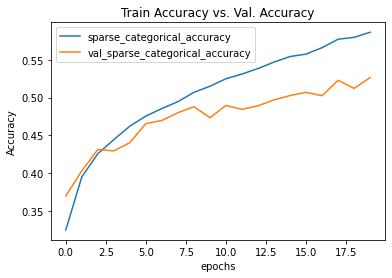

In [180]:
df_history.plot(y=['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'],
                title='Train Accuracy vs. Val. Accuracy',
                xlabel='epochs',
                ylabel='Accuracy',
                legend=True
                )

In [181]:
loss, Accuracy = model.evaluate(x_test, test_labels)
print('loss=',round(loss*100,2),'%')
print('Accuracy=',round(Accuracy*100,2),'%')

313/313 [==============================] - 1s 4ms/step - loss: 1.3541 - sparse_categorical_accuracy: 0.5274
loss= 135.41 %
Accuracy= 52.74 %


### Hagamos predicciones

In [182]:
predictions = model.predict(test_images)

In [183]:
predictions[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [184]:
np.argmax(predictions[0])

3

In [185]:
test_labels[0]

3

In [186]:
#Funciones esto para poder ver todo el set de la prediccion de las 10 clases.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

A continaucion muestro la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

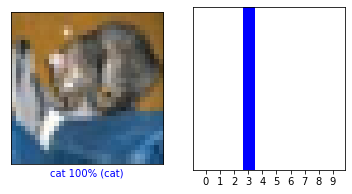

In [187]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

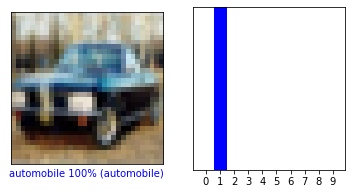

In [188]:
i = 1500
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Multiples imagenes con sus predicciones

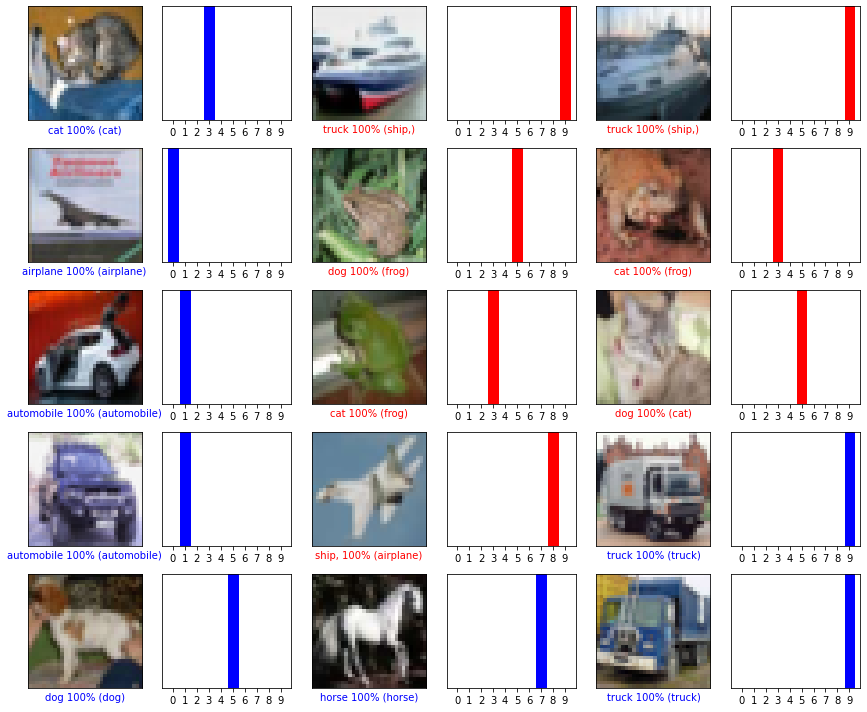

In [189]:
# Visualizamos las primeras x imagenes, su etiqueta predicted y la etiqueta real.
# Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()